# Introduction to Gradient Descent 

Gradient Descent is an iterative optimization algorithm. We will optimize our cost function using Gradient Descent Algorithm.

In [1]:
from numpy import *

## Load dataset

In [2]:
data = genfromtxt('data.csv', delimiter=",")
learning_rate = 0.0001
b_i = 0    # initial y-intercept guess 
m_i = 0    # initial slope guess
num_iterations = 1000
print('Starting gradient descent at b = {0}, m = {1}'.format(b_i, m_i))

Starting gradient descent at b = 0, m = 0


In [3]:
x = data[:,0]
y = data[:,1]

## Plot dataset

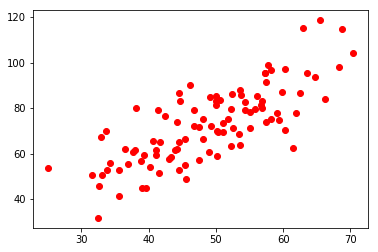

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x,y,c='r')
plt.show()

## Error function

In [5]:
def computeError(b, m, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (m*x[i]+b))**2
    return totalError / float(len(x))

In [6]:
computeError(b_i, m_i, x, y)

5565.107834483211

## Calculate Step Gradient

In [7]:
def step_gradient(b_curr, m_curr, x, y, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(x))
    for i in range(len(x)):
        b_gradient += -(2/N) * (y[i] - ((m_curr * x[i]) + b_curr))
        m_gradient += -(2/N) * x[i] * (y[i] - ((m_curr * x[i]) + b_curr))
    new_b = b_curr - (learningRate * b_gradient)
    new_m = m_curr - (learningRate * m_gradient)
    return [new_b, new_m]

In [8]:
step_gradient(b_i, m_i, x, y, learning_rate)

[0.014547010110737297, 0.7370702973591052]

Each iteration will update m and b to a line that yields slightly lower error than the previous iteration.

The learningRate variable controls how large of a step we take downhill during each iteration. If we take too large of a step, we may step over the minimum. However, if we take small steps, it will require many iterations to arrive at the minimum.

In [9]:
def gradient_descent_runner(x, y, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, x, y, learning_rate)
    return [b,m]

In [10]:
[b,m]=gradient_descent_runner(x, y, b_i, m_i, learning_rate, num_iterations)

In [11]:
print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, computeError(b, m, x,y)))

After 1000 iterations b = 0.08893651993741346, m = 1.4777440851894448, error = 112.61481011613473
